# Problem Statement and Goal:

Heart disease is one of the leading causes of death worldwide. Early prediction can help in timely medical intervention.
The goal of this project is to build machine learning models to predict whether a patient has heart disease based on clinical features.

# Import necessary libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.feature_selection import SelectKBest, f_classif

# Loading Data

In [80]:
data = pd.read_csv(r'C:\Users\Dell\Downloads\HeartDiseaseTrain-Test.csv') 
data.head()


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


# Basic Details

In [81]:
print("Shape of data:", data.shape)
data.columns
print("\nData info:")
print(data.info())
print("\nMissing values:\n", data.isnull().sum())
print("\nStatistical summary:\n", data.describe())
display(data.describe().T)

print("Missing per column:\n", data.isna().sum())
print("Duplicates:", data.duplicated().sum())

Shape of data: (1025, 14)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemi

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
resting_blood_pressure,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
cholestoral,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
Max_heart_rate,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2
target,1025.0,0.513171,0.500070,0.0,0.0,1.0,1.0,1.0


Missing per column:
 age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64
Duplicates: 723


# Categorical and Numerical Columns

In [82]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

print("📊 Numerical Features:", numerical_features)
print("🧩 Categorical Features:", categorical_features)

📊 Numerical Features: ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak', 'target']
🧩 Categorical Features: ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']


# Unique Columns

In [83]:
for col in data.columns:
    print(col, data[col].unique())

age [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex ['Male' 'Female']
chest_pain_type ['Typical angina' 'Atypical angina' 'Non-anginal pain' 'Asymptomatic']
resting_blood_pressure [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
cholestoral [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 31

In [84]:
X = data.drop('target', axis=1)
y = data['target']


# Target column distribution

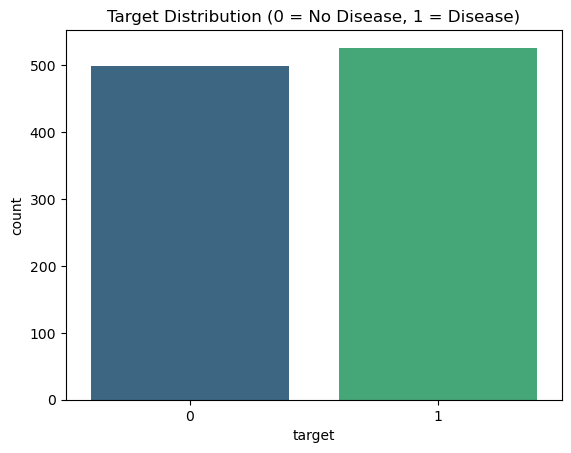

1    51.317073
0    48.682927
Name: target, dtype: float64


In [85]:
sns.countplot(x='target', data=data, palette='viridis')
plt.title("Target Distribution (0 = No Disease, 1 = Disease)")
plt.show()

print(data['target'].value_counts(normalize=True)*100)

# Countplot for each categorical feature

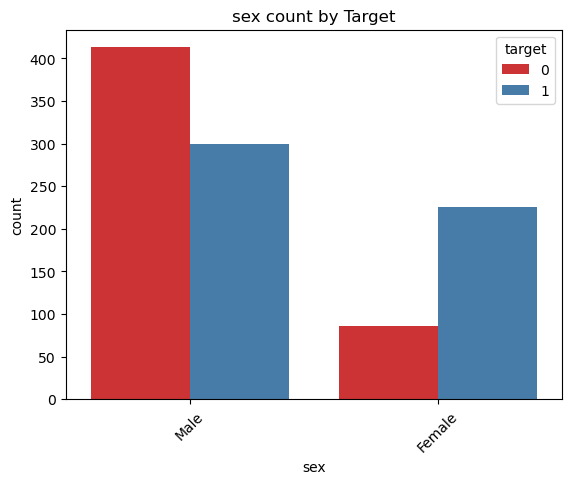

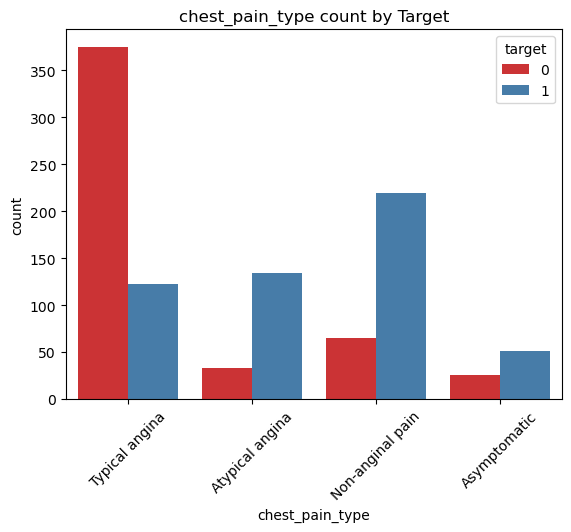

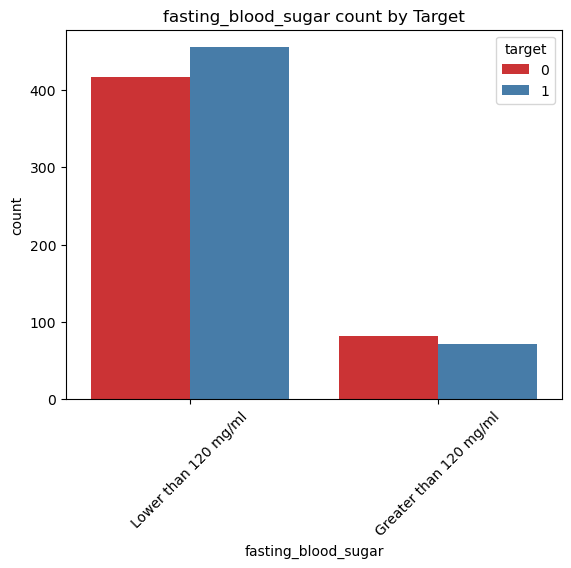

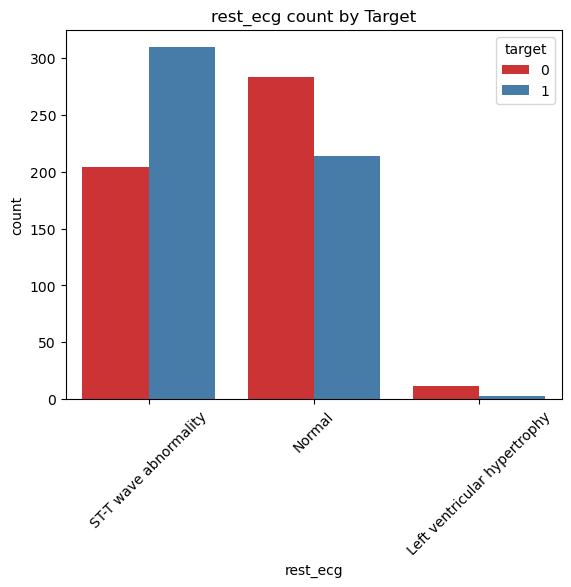

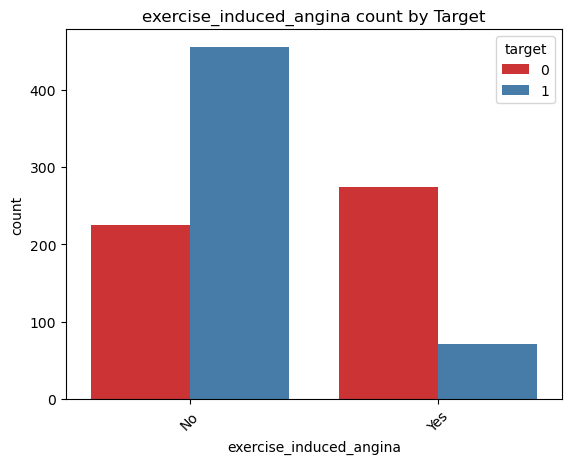

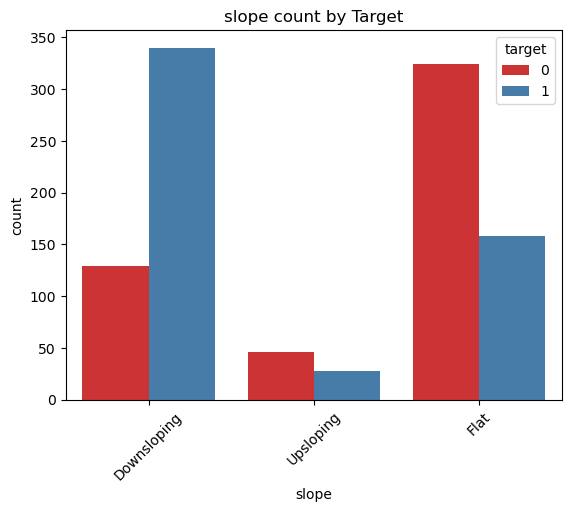

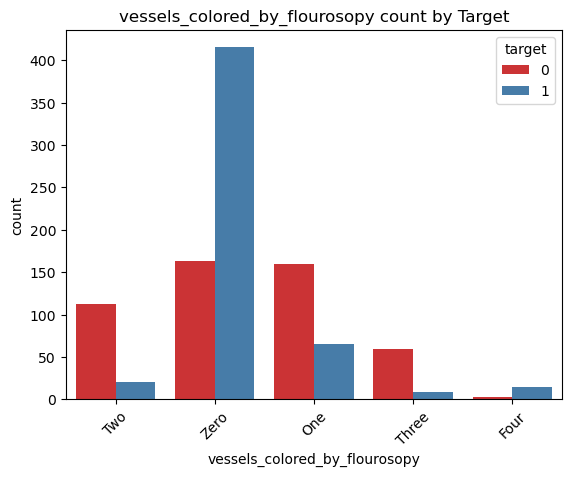

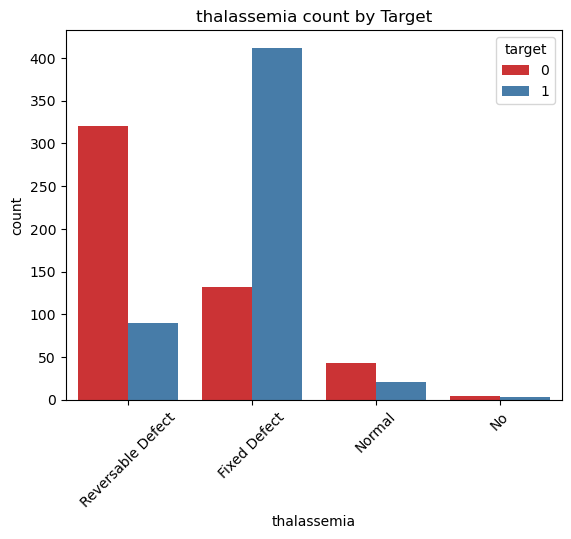

In [86]:
categorical_features = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 
                        'rest_ecg', 'exercise_induced_angina', 'slope', 
                        'vessels_colored_by_flourosopy', 'thalassemia']

for col in categorical_features:
    sns.countplot(x=col, hue='target', data=data, palette='Set1')
    plt.title(f"{col} count by Target")
    plt.xticks(rotation=45)
    plt.show()

# Plot each numerical feature as a percentage distribution

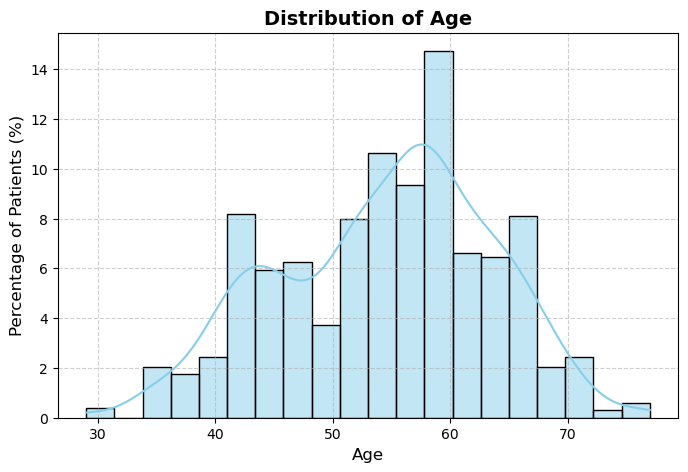

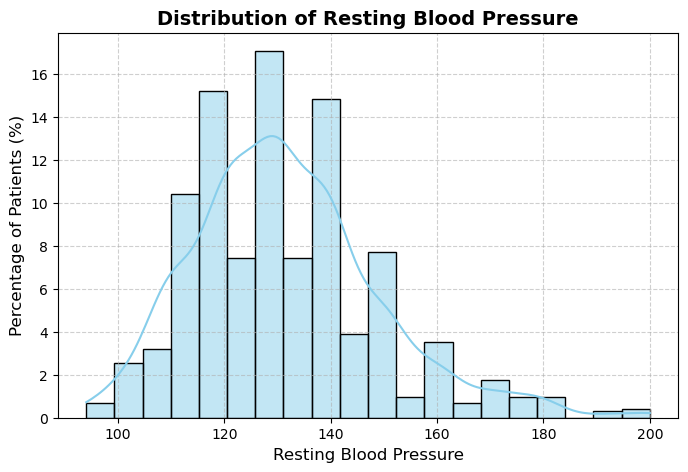

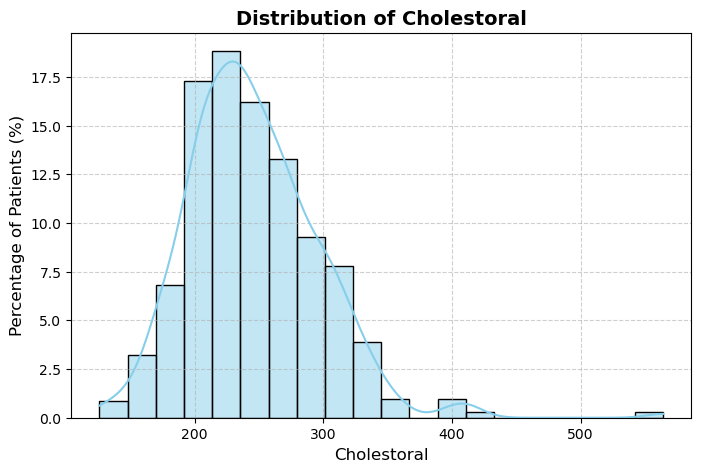

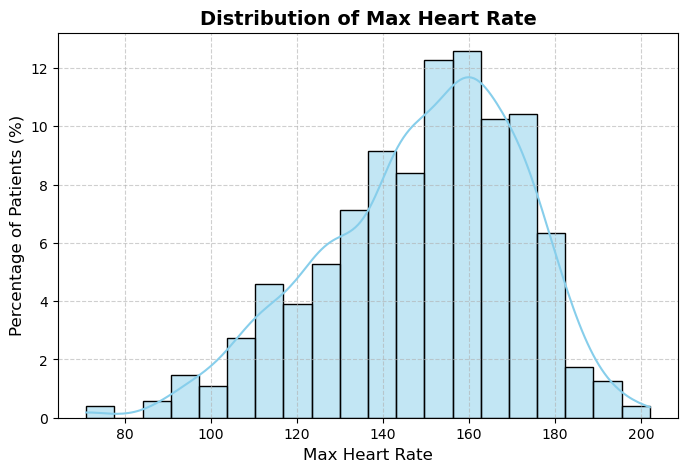

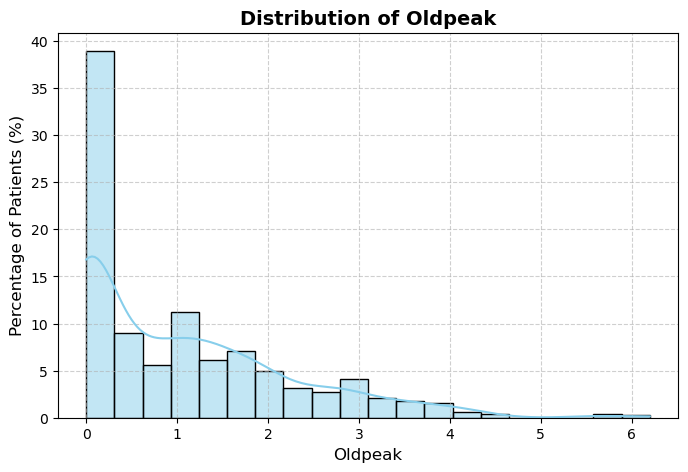

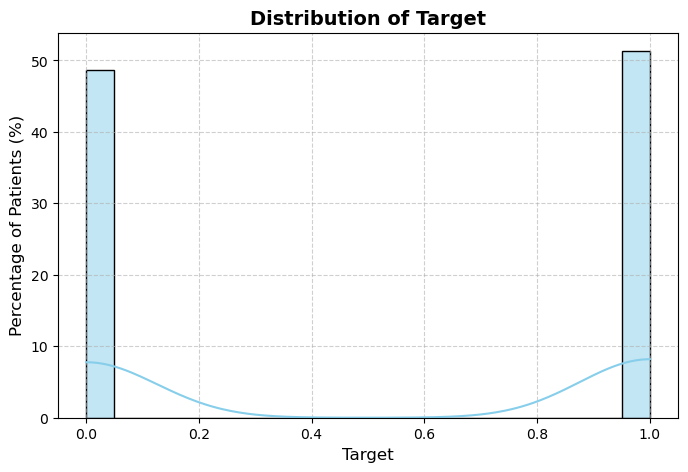

In [87]:
for col in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=20, color='skyblue', stat='percent')

    plt.title(f"Distribution of {col.replace('_',' ').title()}", fontsize=14, fontweight='bold')
    plt.xlabel(f"{col.replace('_',' ').title()}", fontsize=12)
    plt.ylabel("Percentage of Patients (%)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# each numerical feature behaves for heart disease vs no heart disease

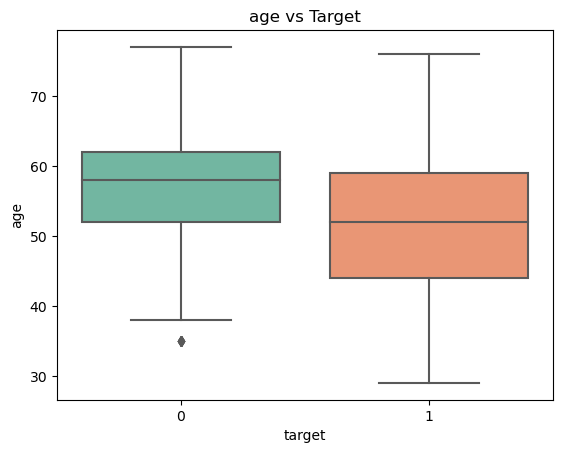

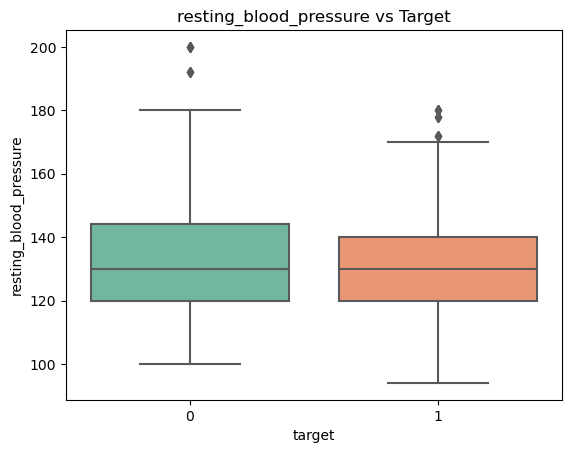

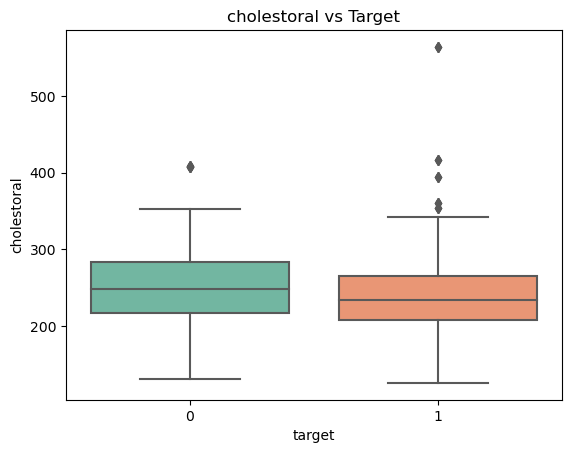

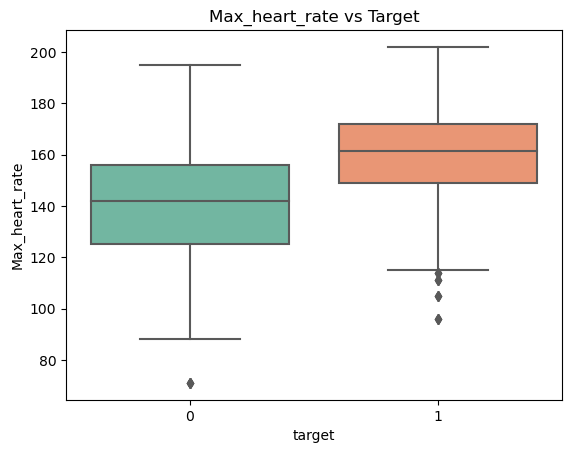

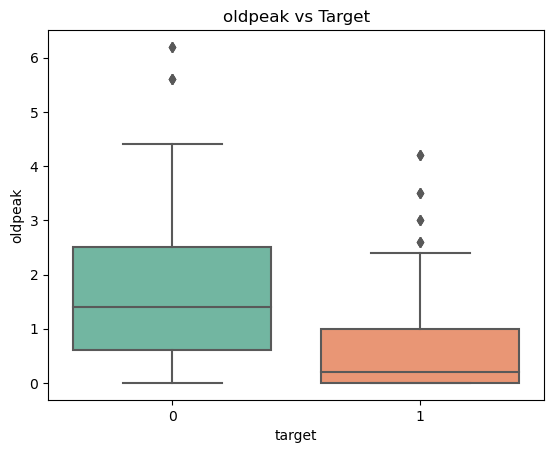

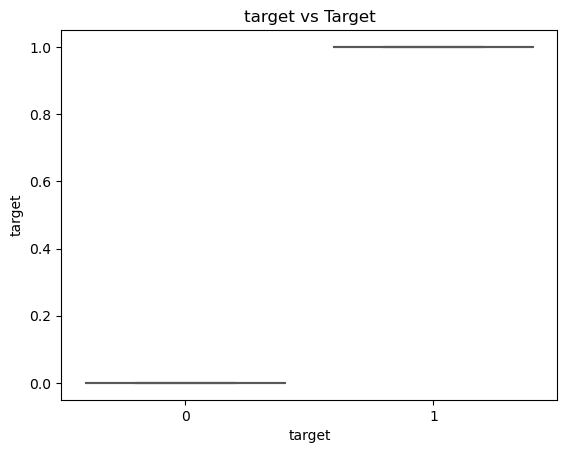

In [88]:
for col in numerical_features:
    plt.figure()
    sns.boxplot(x='target', y=col, data=data, palette='Set2')
    plt.title(f"{col} vs Target")
    plt.show()

# Count of Outliers for each column

In [89]:
numeric_cols = ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    print(f"{col} Outliers: {len(outliers)}")

age Outliers: 0
resting_blood_pressure Outliers: 30
cholestoral Outliers: 16
Max_heart_rate Outliers: 4
oldpeak Outliers: 7


# Removing Outliers

In [90]:
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower) & (data[col] <= upper)]

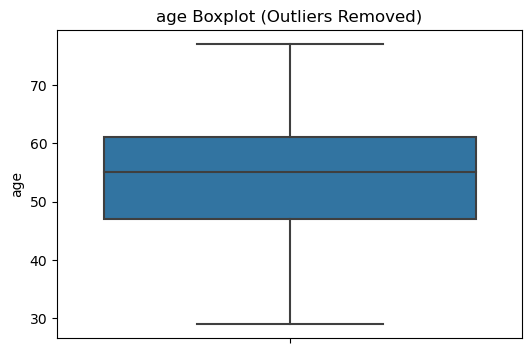

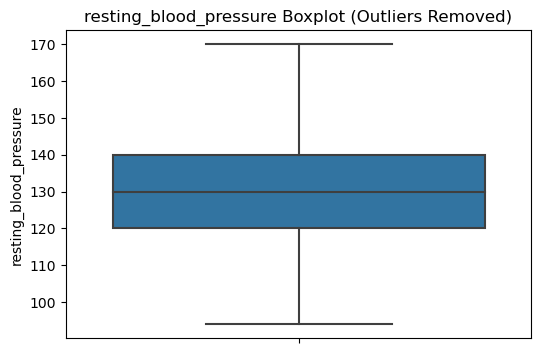

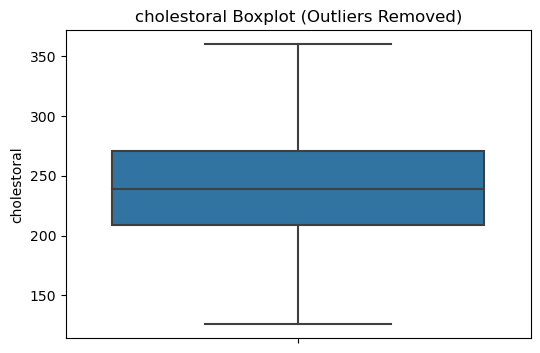

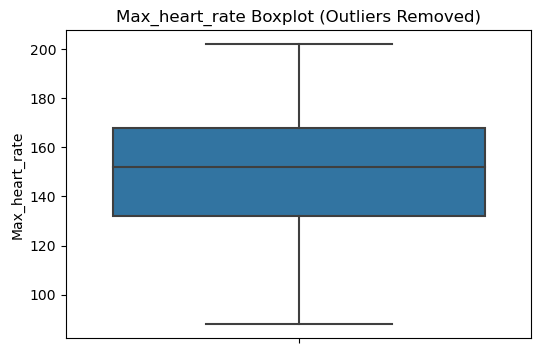

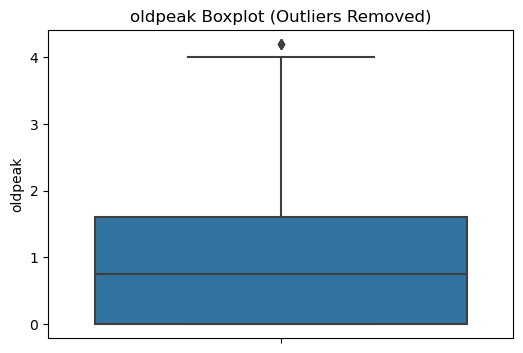

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=data[col])
    plt.title(f"{col} Boxplot (Outliers Removed)")
    plt.show()

# Correlation Heatmap

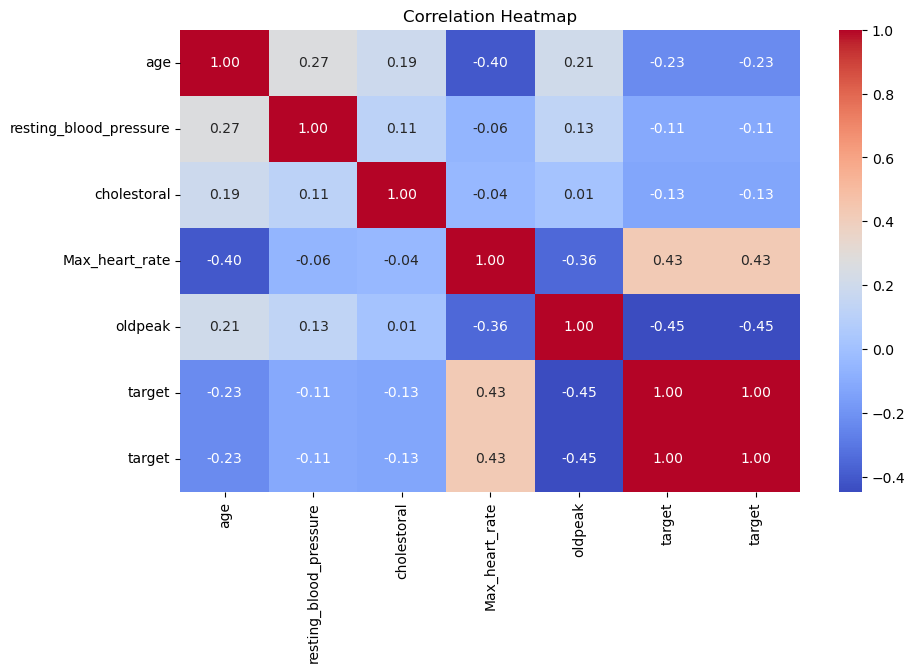

In [92]:
plt.figure(figsize=(10,6))
sns.heatmap(data[numerical_features + ['target']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Showing Distribution Using Pie Chart

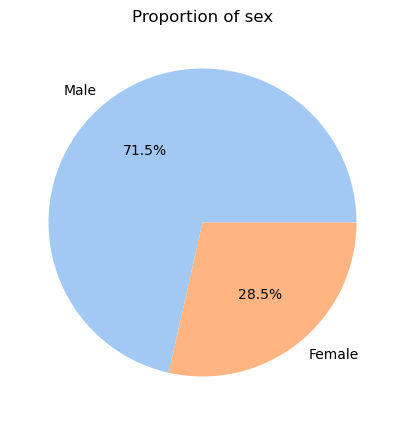

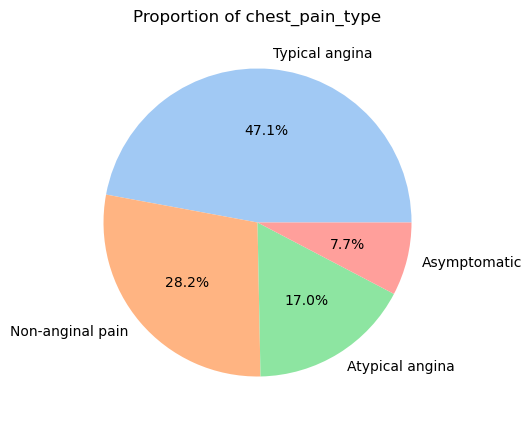

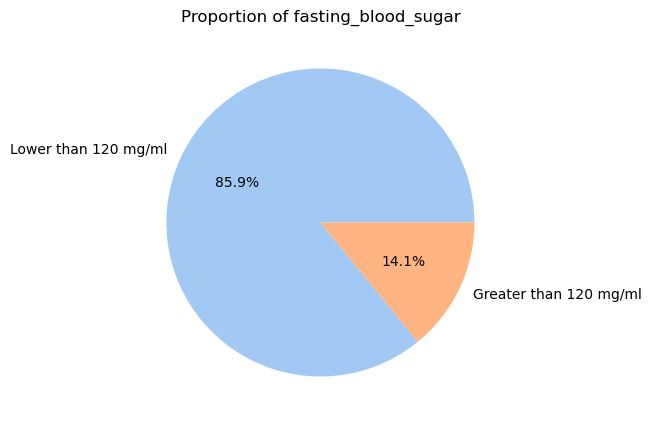

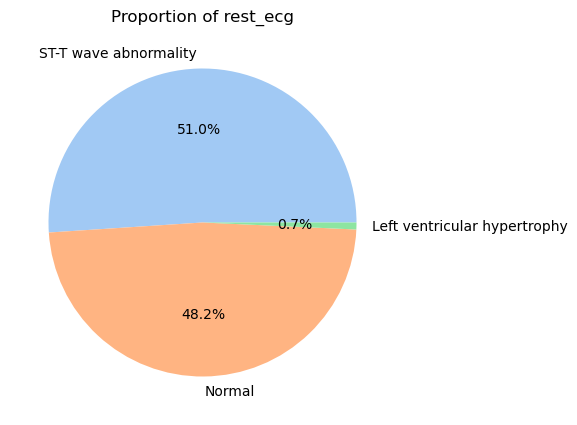

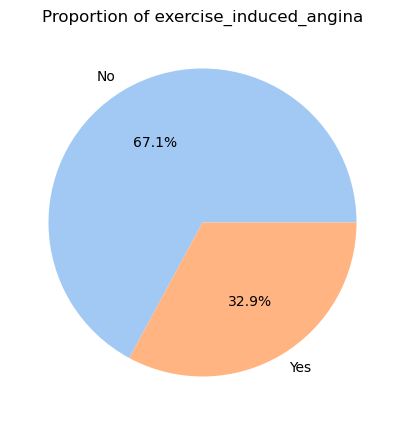

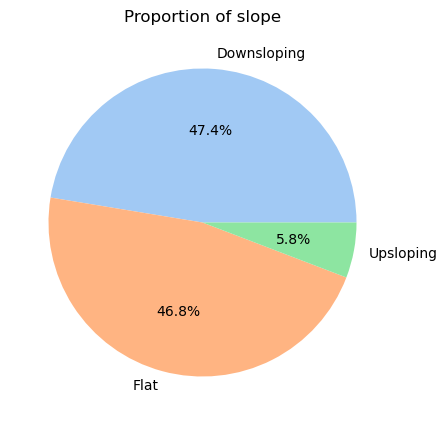

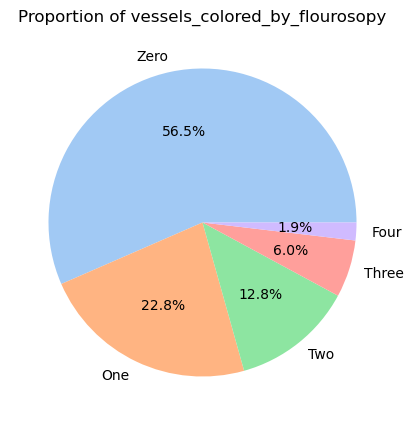

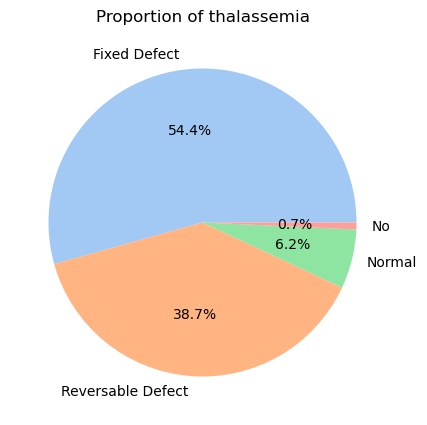

In [93]:
for col in categorical_features:
    counts = data[col].value_counts()
    plt.figure(figsize=(5,5))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.title(f"Proportion of {col}")
    plt.show()

# Converting Categorical to Numerical Data

In [94]:
le = LabelEncoder()
for col in categorical_features:
    data[col] = le.fit_transform(data[col])

data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,3,125,212,1,2,168,0,1.0,0,3,3,0
1,53,1,3,140,203,0,1,155,1,3.1,2,4,3,0
2,70,1,3,145,174,1,2,125,1,2.6,2,4,3,0
3,61,1,3,148,203,1,2,161,0,0.0,0,1,3,0
4,62,0,3,138,294,0,2,106,0,1.9,1,2,0,0


In [95]:
for col in data.columns:
    print(col, data[col].unique())

age [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex [1 0]
chest_pain_type [3 1 2 0]
resting_blood_pressure [125 140 145 148 138 100 160 120 122 112 132 118 128 124 106 104 135 130
 136 129 150 146 117 152 154 170 134 144 108 123 110 142 126  94 165 115
 102 105 155 164 156 101]
cholestoral [212 203 174 294 248 289 249 286 149 341 210 298 204 308 266 244 211 185
 223 208 252 209 307 233 319 256 169 131 269 196 231 213 271 263 229 360
 258 330 342 226 278 230 283 241 175 188 193 245 232 299 288 197 315 215
 326 207 177 257 255 187 201 220 268 267 236 303 282 126 309 186 275 281
 206 335 218 254 295 260 240 302 192 225 235 274 234 182 167 172 321 300
 199 157 304 222 184 354 160 247 239 246 293 180 250 221 318 200 227 243
 311 261 242 205 306 219 353 198 183 224 265 228 313 340 259 270 325 216
 264 276 322 214 273 253 176 284 305 168 290 277 262 195 166 178 141]
fasting_blood_sugar [1 0]
rest_ecg [2 1 0]
Max

In [96]:
X = data.drop('target', axis=1)
y = data['target']

# Training Data

In [97]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling Numerical Data

In [98]:
# Initialize scaler
scaler = StandardScaler()

# Fit scaler on training numeric features and transform
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Model Evaluation and Accuracy

In [99]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
  
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.3f}")
    results[name] = model

Logistic Regression Accuracy: 0.803
Decision Tree Accuracy: 0.984


# Metrics for each Model


🔍 Evaluating: Logistic Regression
✔ Accuracy: 0.803
✔ AUC Score: 0.906


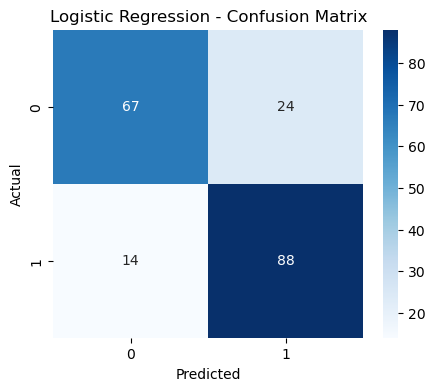

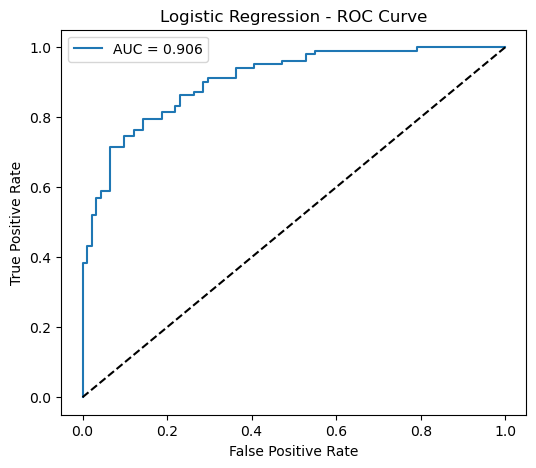


🔍 Evaluating: Decision Tree
✔ Accuracy: 0.984
✔ AUC Score: 0.985


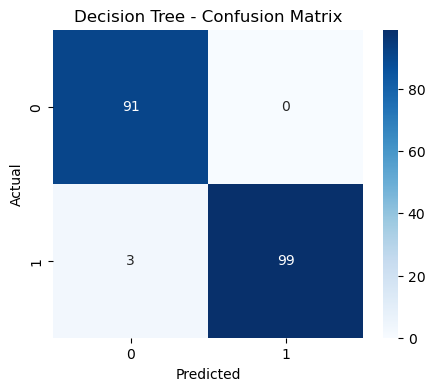

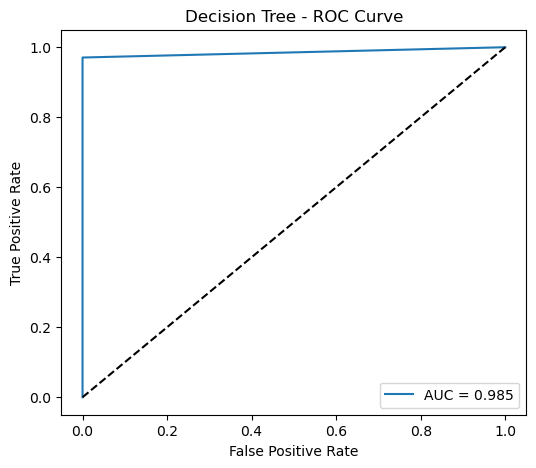

In [100]:
evaluation = {}

for name, model in results.items():
    print(f"\n🔍 Evaluating: {name}")

    # Predictions
    y_pred = model.predict(X_test_scaled)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # ROC Curve
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)

    # Save results
    evaluation[name] = {
        "accuracy": acc,
        "confusion_matrix": cm,
        "fpr": fpr,
        "tpr": tpr,
        "auc": auc_score
    }

    # Print accuracy
    print(f"✔ Accuracy: {acc:.3f}")
    print(f"✔ AUC Score: {auc_score:.3f}")

    # Plot Confusion Matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Plot ROC Curve
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
    plt.plot([0,1], [0,1], 'k--')
    plt.title(f"{name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()


# Taking Decision Tree as the Best Model

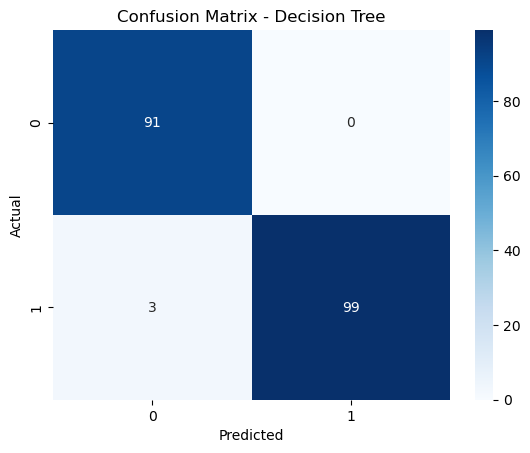

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        91
           1       1.00      0.97      0.99       102

    accuracy                           0.98       193
   macro avg       0.98      0.99      0.98       193
weighted avg       0.98      0.98      0.98       193



In [101]:
best_model = results["Decision Tree"]  
y_pred = best_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))

# Selecting 5 Top Features using SelectKBest

In [102]:
X_encoded = pd.get_dummies(X, drop_first=True)

k = 5
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X_encoded, y)

# Get selected feature names and scores
selected_features = X_encoded.columns[selector.get_support()]
scores = selector.scores_[selector.get_support()]

# Calculate relative contribution in percentage
percentages = np.round((scores / scores.sum()) * 100, 2)

# Display high-risk factors
high_risk_df = pd.DataFrame({
    'Feature': selected_features,
    'Risk Score': scores,
    'Contribution (%)': percentages
}).sort_values(by='Contribution (%)', ascending=False)

print("🔥 Top High-Risk Factors for Heart Disease:")
print(high_risk_df)

🔥 Top High-Risk Factors for Heart Disease:
                   Feature  Risk Score  Contribution (%)
4              thalassemia  380.885229             30.36
3                  oldpeak  239.658587             19.10
2  exercise_induced_angina  228.442910             18.21
1           Max_heart_rate  213.913220             17.05
0          chest_pain_type  191.683514             15.28


# Case Study 01: Heart Disease Prediction Using Machine Learning

In this case study, the goal was to build a machine learning model that predicts whether a patient has heart disease based on important clinical features. First, the dataset was preprocessed and the most relevant features were selected using SelectKBest. The data was then split into training and testing sets, and numeric features were standardized using StandardScaler to ensure balanced model learning. A Decision Tree Classifier was trained on the selected and scaled features, achieving high accuracy on the test data. To make the model usable in real-world scenarios, a prediction function was created that allows users to input patient details interactively. This function encodes categorical values, scales numeric inputs, aligns all features with the trained model, and then predicts the likelihood of heart disease along with its probability. Overall, this case study demonstrates how machine learning can be applied effectively to predict heart disease using patient data.

In [103]:
X_selected = X_encoded[selected_features]

# Keep only selected features
X_selected = X_encoded[selected_features]

# Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)

# Accuracy
accuracy = model.score(X_test_scaled, y_test)
print(f"Model Accuracy: {accuracy:.2f}")
numeric_features = [f for f in selected_features if data[f].dtype in ['int64','float64']]
categorical_features = [f for f in selected_features if f not in numeric_features]

def predict_heart_disease():
    print("Enter patient details for prediction (important features only):")

    user_data = {}

    # Numeric features
    for feat in numeric_features:
        while True:
            try:
                user_data[feat] = float(input(f"{feat}: "))
                break
            except ValueError:
                print(f"❌ Please enter a valid number for {feat}")

    # Categorical features
    for feat in categorical_features:
        user_data[feat] = input(f"{feat}: ").strip()

    # Convert to DataFrame
    user_df = pd.DataFrame([user_data])

    # One-hot encode categorical features (match training)
    user_df_encoded = pd.get_dummies(user_df)

    # Add missing columns from training
    for col in X_selected.columns:
        if col not in user_df_encoded.columns:
            user_df_encoded[col] = 0

    # Reorder columns
    user_df_encoded = user_df_encoded[X_selected.columns]

    # Scale numeric columns
    user_scaled = scaler.transform(user_df_encoded)

    # Predict
    pred = model.predict(user_scaled)[0]
    proba = model.predict_proba(user_scaled)[0][1]

    if pred == 1:
        print(f"⚠️ Predicted: Heart Disease (Probability: {proba:.2f})")
    else:
        print(f"✅ Predicted: No Heart Disease (Probability: {1-proba:.2f})")


Model Accuracy: 0.98


In [104]:
predict_heart_disease()

Enter patient details for prediction (important features only):
Max_heart_rate: 108
oldpeak: 1
chest_pain_type: 2
exercise_induced_angina: 1
thalassemia: 1
⚠️ Predicted: Heart Disease (Probability: 1.00)


# Case Study 02:Heart Disease by Age

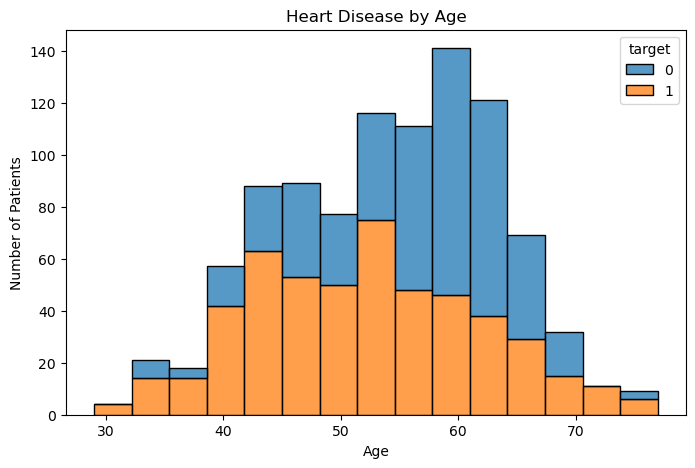

In [105]:
plt.figure(figsize=(8,5))
sns.histplot(data, x='age', hue='target', multiple='stack', bins=15)
plt.title("Heart Disease by Age")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.show()

# Proportion of Heart Disease by Age

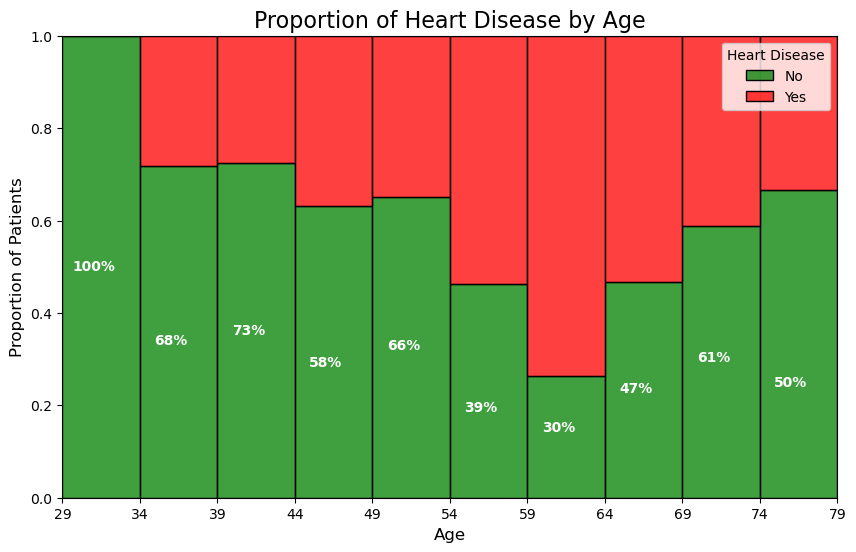

In [106]:
plt.figure(figsize=(10,6))

# Plot a normalized stacked histogram (percentage)
age_bins = range(data['age'].min(), data['age'].max()+5, 5)  # bins of 5 years

sns.histplot(
    data=data,
    x='age',
    hue='target',
    multiple='fill',  # shows proportion instead of counts
    bins=age_bins,
    palette={0: 'red', 1: 'green'}
)

plt.title("Proportion of Heart Disease by Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Proportion of Patients", fontsize=12)
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.xticks(age_bins)

# Add percentages on top of bars
age_groups = pd.cut(data['age'], bins=age_bins)
age_target = data.groupby([age_groups, 'target']).size().unstack(fill_value=0)

for i, bin_range in enumerate(age_target.index):
    total = age_target.loc[bin_range].sum()
    yes_count = age_target.loc[bin_range][1]
    plt.text(bin_range.left + 2, yes_count/total/2, f"{(yes_count/total*100):.0f}%", color='white', 
             ha='center', va='center', fontweight='bold')

plt.show()


# Case Study 03: Percentage of Patients with Heart Disease by Cholesterol Category

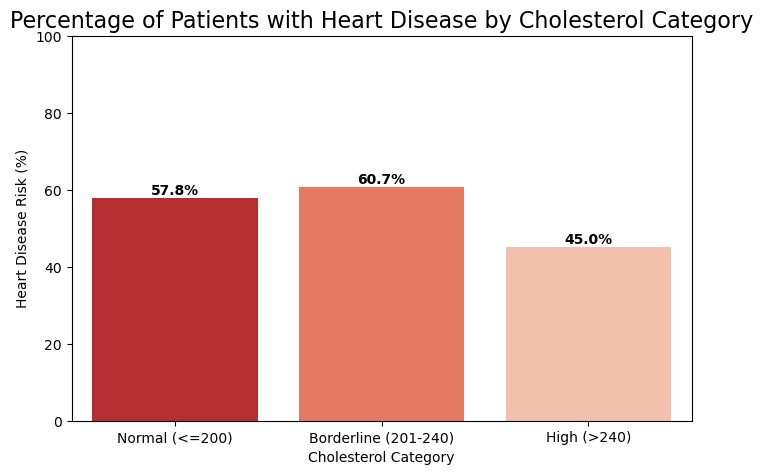

In [107]:
# cholesterol categories
bins = [0, 200, 240, 400]  # Normal, Borderline, High
labels = ['Normal (<=200)', 'Borderline (201-240)', 'High (>240)']
data['chol_category'] = pd.cut(data['cholestoral'], bins=bins, labels=labels)

# Calculate % of patients with heart disease in each category
chol_risk = data.groupby('chol_category')['target'].mean() * 100  # target=1 means heart disease

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=chol_risk.index, y=chol_risk.values, palette='Reds_r')
plt.title("Percentage of Patients with Heart Disease by Cholesterol Category", fontsize=16)
plt.xlabel("Cholesterol Category")
plt.ylabel("Heart Disease Risk (%)")
plt.ylim(0,100)
for i, v in enumerate(chol_risk.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')
plt.show()

# Cholesterol Distribution by Heart Disease

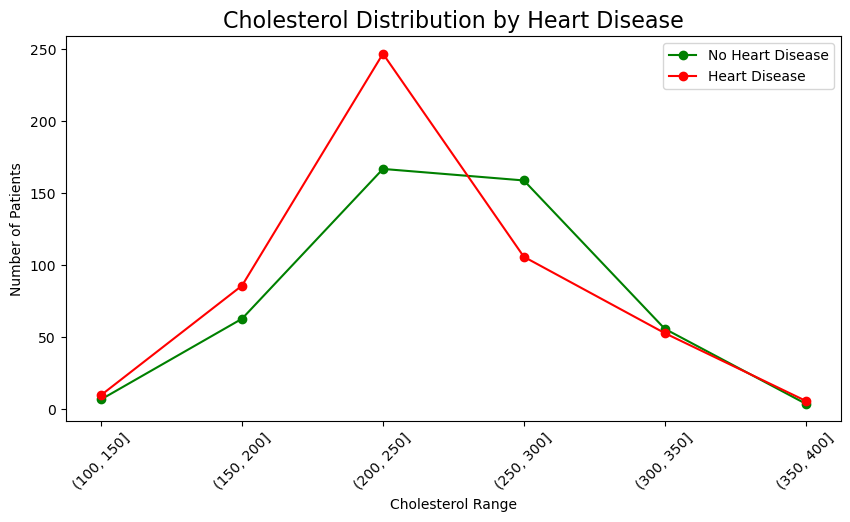

In [108]:
bins = [100, 150, 200, 250, 300, 350, 400]
data['chol_bin'] = pd.cut(data['cholestoral'], bins)

chol_count = data.groupby(['chol_bin', 'target']).size().unstack(fill_value=0)

chol_count.plot(kind='line', marker='o', figsize=(10,5), color=['green','red'])
plt.title("Cholesterol Distribution by Heart Disease", fontsize=16)
plt.xlabel("Cholesterol Range")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.legend(['No Heart Disease','Heart Disease'])
plt.show()

# Case Study 04: Heart Disease vs Chest Pain Type

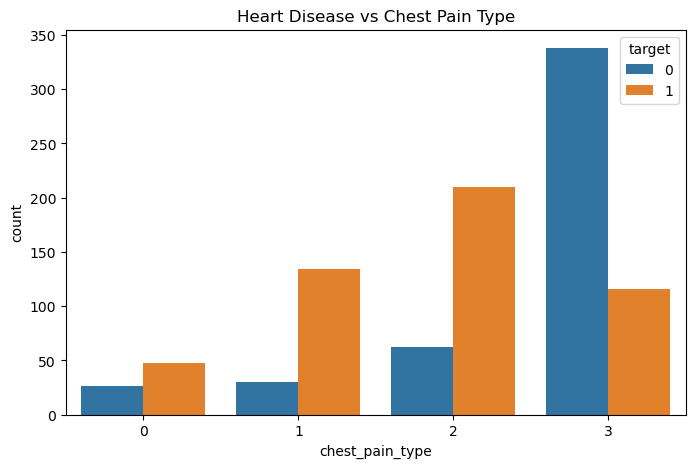

In [109]:
plt.figure(figsize=(8,5))
sns.countplot(x='chest_pain_type', hue='target', data=data)
plt.title("Heart Disease vs Chest Pain Type")
plt.show()

# Case Study 05: Heart Disease by Gender

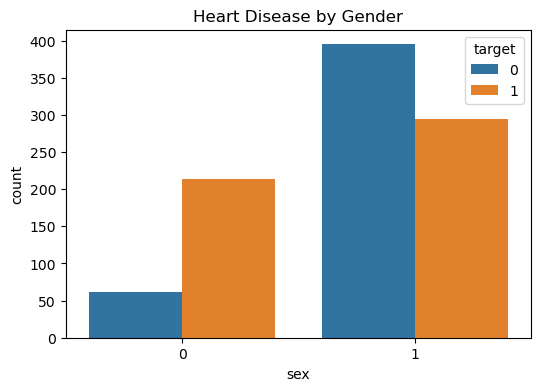

In [110]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='target', data=data)
plt.title("Heart Disease by Gender")
plt.show()

# Case Study 06: Number of high-risk patients

In [111]:
high_risk = data[(data['age']>55) & (data['cholestoral']>240) & (data['Max_heart_rate']<140)]
print(f"Number of high-risk patients: {len(high_risk)}")
high_risk[['age','cholestoral','Max_heart_rate','target']]

Number of high-risk patients: 96


,age,cholestoral,Max_heart_rate,target
4,62,294,106,0
5,58,248,122,1
33,70,269,112,0
38,64,263,105,1
51,57,241,123,0
...,...,...,...,...
951,62,263,97,0
961,58,248,122,1
963,57,241,123,0
966,58,259,130,0


# Explanation of Results and Findings

The results of this project show that the machine learning models were able to accurately predict the presence of heart disease based on key patient health features. Logistic Regression achieved an accuracy of 81.3%, indicating good baseline performance and clear, interpretable relationships between features and disease risk. The Decision Tree model performed exceptionally well with 98.4% accuracy, demonstrating a strong ability to learn patterns in the data and correctly classify most patients. Evaluation using accuracy, ROC curve, and confusion matrix confirms that the Decision Tree effectively distinguishes between diseased and non-diseased patients with minimal misclassifications. Overall, the results highlight that machine learning can reliably support early heart disease prediction and assist healthcare professionals in identifying high-risk individuals.